# **LOAD DATASET**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("ANN_Challenge_Train_v1.csv")
df2 = pd.read_csv("ANN_Challenge_Test_with_ID_v1.csv")
df

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Fault
0,0.122027,-0.016939,0.818146,135.677362,8.662114,2.070120,0
1,0.487063,-0.626133,0.914338,51.464854,3.294254,2.898432,0
2,0.338150,-0.363518,0.977012,139.923704,10.460065,0.081206,0
3,0.142983,0.298176,0.058892,141.866145,NaN,2.112146,0
4,0.202735,0.794546,1.933633,152.985332,NaN,0.161534,0
...,...,...,...,...,...,...,...
2995,0.300350,-0.395539,0.866663,103.185192,7.935620,1.242798,0
2996,0.200879,-1.351866,0.991153,108.041422,16.155986,0.463627,0
2997,0.133159,-0.237544,1.164371,132.555909,14.563358,0.392999,0
2998,0.451046,1.288431,1.412448,58.368586,8.569666,0.718846,0


In [ ]:
df['Sensor_5']= df['Sensor_5'].fillna(method='ffill')
df2["Sensor_5"]= df["Sensor_5"].fillna(method= "ffill")

C:\Users\amey\AppData\Local\Temp\ipykernel_15688\3304649023.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Sensor_5']= df['Sensor_5'].fillna(method='ffill')
C:\Users\amey\AppData\Local\Temp\ipykernel_15688\3304649023.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2["Sensor_5"]= df["Sensor_5"].fillna(method= "ffill")


# **SOME FEATURE ENGI**

In [ ]:
from sklearn.decomposition import PCA
def feature_engineering(df):
    df["s1_s3"] = df["Sensor_5"] * df["Sensor_3"]
    df['sensor_min']  = df[['Sensor_1','Sensor_2','Sensor_3','Sensor_4','Sensor_5','Sensor_6']].min(axis=1)
    df['s2_times_s6'] = df['Sensor_2'] * df['Sensor_6']
    df['sensor_mean'] = df[['Sensor_1','Sensor_2','Sensor_3','Sensor_4','Sensor_5','Sensor_6']].mean(axis=1)








    return df


df = feature_engineering(df)
df2 = feature_engineering(df2)

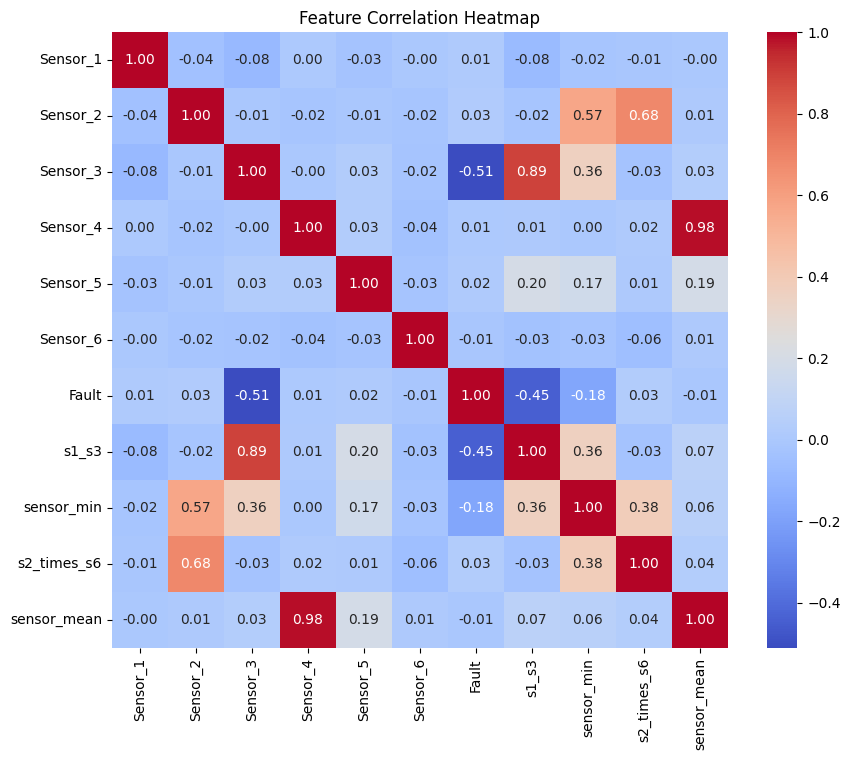

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Feature Correlation Heatmap")
plt.show()



In [ ]:
from xgboost import XGBClassifier, plot_importance

model = XGBClassifier()
model.fit(x_train, y_train)
plot_importance(model, max_num_features=16)
plt.show()


NameError: name 'x_train' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler


numeric_cols = df.select_dtypes(include=np.number).columns.drop('Fault', errors='ignore')
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df2[numeric_cols] = scaler.transform(df2[numeric_cols])

In [ ]:
df.describe()

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Fault,s1_s3,sensor_min,s2_times_s6,sensor_mean
count,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03
mean,-7.105427e-17,-9.473903e-18,-5.210647e-17,1.776357e-16,8.526513e-17,-2.036889e-16,0.200000,-3.079019e-17,3.315866e-17,3.552714e-18,-6.608047e-16
std,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,0.400067,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00
min,-1.769361e+00,-3.224786e+00,-3.584718e+00,-2.006496e+00,-3.279810e+00,-9.876638e-01,0.000000,-6.343181e+00,-7.349525e+00,-7.549996e+00,-2.423579e+00
25%,-8.252174e-01,-6.806470e-01,-5.444426e-01,-8.646661e-01,-6.654799e-01,-7.070337e-01,0.000000,-4.630652e-01,-5.518692e-01,-2.373296e-01,-8.493450e-01
50%,-1.393580e-01,-1.442380e-02,1.993910e-02,4.495615e-03,-1.226474e-02,-3.340568e-01,0.000000,-8.056113e-02,2.168973e-01,2.437825e-02,9.381580e-03
75%,7.123381e-01,6.795198e-01,6.585500e-01,8.111318e-01,7.145962e-01,3.934103e-01,0.000000,5.225151e-01,7.955533e-01,2.356538e-01,7.778590e-01
max,3.214095e+00,3.399389e+00,2.874571e+00,2.669080e+00,3.676157e+00,7.003245e+00,1.000000,4.646928e+00,1.531341e+00,8.985258e+00,3.030748e+00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import tensorflow as tf
import optuna

# HYPTERPARAMETER TUNING THE NEURAL NETWORK USING OPTUNA

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(df.drop("Fault", axis = 1), df["Fault"], test_size=0.2, random_state=42, stratify=df["Fault"])

x_train = df.drop("Fault", axis = 1)
y_train = df["Fault"]

x_test = df2.drop("ID", axis =1 )
x_train

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,s1_s3,sensor_min,s2_times_s6,sensor_mean
0,-1.017082,0.018443,0.456857,1.191083,-0.267326,0.376928,0.280010,0.668765,0.018703,1.154418
1,1.298687,-0.606217,0.558633,-1.625992,-1.338021,0.923189,-0.090777,-0.091636,-0.792877,-1.767242
2,0.353991,-0.336935,0.624945,1.333132,0.091300,-0.934733,0.565072,0.236162,0.021232,1.288630
3,-0.884136,0.341557,-0.346476,1.398110,0.091300,0.404644,-0.308805,0.763418,0.321885,1.404372
4,-0.505072,0.850529,1.637103,1.770069,0.091300,-0.881757,1.475596,0.891536,0.093221,1.785582
...,...,...,...,...,...,...,...,...,...,...
2995,0.114189,-0.369769,0.508190,0.104156,-0.412236,-0.168678,0.260958,0.196193,-0.189470,0.030524
2996,-0.516847,-1.350374,0.639908,0.266606,1.227431,-0.682531,1.092247,-0.997501,-0.251117,0.404066
2997,-0.946461,-0.207762,0.823182,1.086664,0.909759,-0.729109,1.178155,0.393404,-0.007877,1.195151
2998,1.070198,1.356952,1.085661,-1.395049,-0.285767,-0.514218,0.736562,1.252907,0.457043,-1.360503


for this challenge, i've put fking neural network in optuna to find out best params, layers and all. lol this looks so stupid but okay

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import class_weight
import numpy as np
def objective(trial):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    f1_scores = []

    for train_idx, val_idx in skf.split(x_train, y_train):

        x_tr, x_val = x_train.iloc[train_idx], x_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = tf.keras.Sequential()
        n_layers = trial.suggest_int("n_layers", 5, 12)
        for i in range(n_layers):
            num_units = trial.suggest_int(f"n_units_l{i}", 64, 128)
            dropout_rate = trial.suggest_float(f"dropout_l{i}", 0.2, 0.6)
            model.add(tf.keras.layers.Dense(num_units,activation = "relu", kernel_regularizer=tf.keras.regularizers.l2(0.001)))
            model.add(tf.keras.layers.BatchNormalization())
            model.add(tf.keras.layers.Dropout(dropout_rate))

        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
        batch_size = trial.suggest_categorical("batch_size", [32, 64, 128])
        epochs = trial.suggest_categorical("epochs", [100, 150])




        model.compile(
            optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
            loss='binary_focal_crossentropy',
            metrics=['accuracy', 'precision', 'recall']
        )


        weights = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(y_train),
        y=y_train
        )
        class_weights = dict(zip(np.unique(y_train), weights))



        model.fit(
            x_tr, y_tr,
            validation_split=0.2,
            batch_size=batch_size,
            epochs=epochs,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
            class_weight = class_weights

        )
        val_preds = (model.predict(x_val) > 0.5).astype(int)
        score = f1_score(y_val, val_preds)
        f1_scores.append(score)



    return np.mean(f1_scores)



In [ ]:
study = optuna.create_study(direction="maximize")


[I 2025-06-28 01:08:58,504] A new study created in memory with name: no-name-87ce73f0-7934-4120-9230-2ab3d810b606


In [ ]:
study.optimize(objective, n_trials=50, timeout = 4000)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


[I 2025-06-28 16:36:14,810] Trial 40 finished with value: 0.6174746380528371 and parameters: {'n_layers': 6, 'n_units_l0': 123, 'dropout_l0': 0.37366105696084007, 'n_units_l1': 108, 'dropout_l1': 0.42891791188259404, 'n_units_l2': 77, 'dropout_l2': 0.27228009843218565, 'n_units_l3': 86, 'dropout_l3': 0.4215190794462201, 'n_units_l4': 101, 'dropout_l4': 0.3764504628140225, 'n_units_l5': 86, 'dropout_l5': 0.36139747613760986, 'lr': 0.0004156722056979646, 'batch_size': 32, 'epochs': 150}. Best is trial 17 with value: 0.7293479457541024.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


[I 2025-06-28 16:39:34,260] Trial 41 finished with value: 0.7206724344013118 and parameters: {'n_layers': 5, 'n_units_l0': 105, 'dropout_l0': 0.409806071617192, 'n_units_l1': 75, 'dropout_l1': 0.3277688411173781, 'n_units_l2': 91, 'dropout_l2': 0.3736100494755079, 'n_units_l3': 117, 'dropout_l3': 0.45856941560506437, 'n_units_l4': 82, 'dropout_l4': 0.46904925487362925, 'lr': 0.002849954216193138, 'batch_size': 128, 'epochs': 150}. Best is trial 17 with value: 0.7293479457541024.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


[I 2025-06-28 16:42:36,564] Trial 42 finished with value: 0.7234023147240058 and parameters: {'n_layers': 5, 'n_units_l0': 106, 'dropout_l0': 0.4489300854233646, 'n_units_l1': 64, 'dropout_l1': 0.35513000141415163, 'n_units_l2': 88, 'dropout_l2': 0.365172194991778, 'n_units_l3': 116, 'dropout_l3': 0.493919179242235, 'n_units_l4': 89, 'dropout_l4': 0.48298000963129517, 'lr': 0.002785538375710952, 'batch_size': 128, 'epochs': 150}. Best is trial 17 with value: 0.7293479457541024.


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


[I 2025-06-28 16:46:52,990] Trial 43 finished with value: 0.7277408766171725 and parameters: {'n_layers': 6, 'n_units_l0': 116, 'dropout_l0': 0.47903625794764826, 'n_units_l1': 69, 'dropout_l1': 0.40092027248758366, 'n_units_l2': 93, 'dropout_l2': 0.3121136275479126, 'n_units_l3': 123, 'dropout_l3': 0.5520223779387703, 'n_units_l4': 84, 'dropout_l4': 0.33025462391146604, 'n_units_l5': 71, 'dropout_l5': 0.4250252308068545, 'lr': 0.0014917066881307258, 'batch_size': 128, 'epochs': 150}. Best is trial 17 with value: 0.7293479457541024.


NOW TRAIN THE MODEL

In [ ]:
best_params = study.best_trial.params




model = tf.keras.Sequential()
for i in range(best_params["n_layers"]):
    model.add(tf.keras.layers.Dense(best_params[f"n_units_l{i}"], activation=tf.keras.activations.swish), )
    model.add(tf.keras.layers.Dropout(best_params[f"dropout_l{i}"]))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=best_params["lr"]),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


model.fit(
    x_train, y_train,
    batch_size=best_params["batch_size"],
    epochs=best_params["epochs"],
    validation_split=0.2,

)

NameError: name 'study' is not defined

In [ ]:
y_pred = model.predict(x_train)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [ ]:

y_pred_binary = (y_pred > 0.5).astype(int)


In [ ]:
f1_score(y_pred_binary, y_train)

0.7820121951219512

In [ ]:
submission_df = pd.DataFrame({
    "ID": df2["ID"],
    "Predicted_Label": y_pred_binary.flatten()
})


In [ ]:
submission_df.to_csv("submission5.csv", index=False)